## OpenCV幾何轉換

幾何轉換是將一個影像映射到另一個影像的過程，OpenCV也提供了多種函式可以簡單高效率的完成圖像的幾何轉換。
1. 縮放
2. 翻轉
3. 仿射轉換
4. 透視

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 4.1.2
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## 縮放

在OpenCV中可以使用`cv2.resize()`實現縮放功能，函式如下:

`dst = cv2.resize(src, dsize[, fx[, fy[, interpolation]]])`

dsize為輸出影像尺寸，fx為水平方向的縮放比例，fy為垂直方向的縮放比例，interpolation為內插方法。

內插方式有以下:

`INTER_NEAREST`:最鄰近內插

`INTER_LINEAR`:雙線性內插(預設)

`INTER_CUBIC`:三次樣條內插

`INTER_AREA`:區域內插

`INTER_LANCZOS4`:使用8x8近鄰的Lanczos內插方法

resize方法及參數可以參考[官方網站](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html)。

resize最後的輸出靶心圖大小是依據指定的dsize或fx fy所決定，若未指定dsize則參考給定的fx及fy，若三個參數都有指定，則會依dsize來決定輸出大小。

img_RGB的維度為: (512, 512, 3)


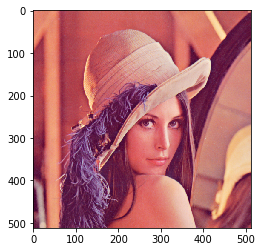

img_RGB_resize(128*256)的維度為: (256, 128, 3)


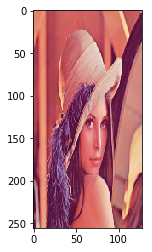

img_RGB_resize(fx=3,fy=2)的維度為: (1024, 1536, 3)


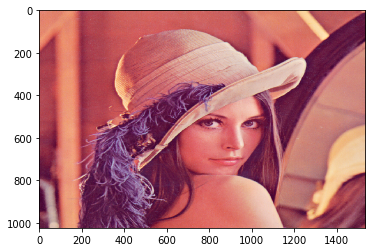

In [3]:
img_BGR = cv2.imread('data/Lenna.png')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)

print('img_RGB的維度為:', img_RGB.shape)
plt.imshow(img_RGB)
plt.show()

# 改為128*128(不須給定通道維度)，在有給定dsize的情況下，fx及fy參數會失效
img_RGB_resize = cv2.resize(img_RGB, (128, 256), fx = 3, fy = 2)
print('img_RGB_resize(128*256)的維度為:', img_RGB_resize.shape)
plt.imshow(img_RGB_resize)
plt.show()

# fx和fy都變為兩倍(僅在dsize為None時有效)，dsize為必填參數一定要指定，若將None刪除將會出錯
img_RGB_resize = cv2.resize(img_RGB, None, fx = 3, fy = 2)
print('img_RGB_resize(fx=3,fy=2)的維度為:', img_RGB_resize.shape)
plt.imshow(img_RGB_resize)
plt.show()

>需要注意的是，dsize輸入的是x方向及y方向最後要保留的像素值多寡，與圖片shape的前兩個值正好相反，在2.minutiae.ipynb有此細節的介紹和解釋。

## 翻轉

在OpenCV中可以使用`cv2.flip()`實現翻轉功能，函式如下:

`dst = cv2.flip(src, flipCode)`

dsize為輸出影像大小，flipCode為翻轉方式。

flipCode = 0，則繞X軸翻轉；flipCode > 0，則繞Y軸翻轉；flipCode < 0，則同時繞X軸及Y軸翻轉:

$
dst_{ij}=\begin{cases}
src_{src.rows-i-1, j},\quad flipCode = 0 \\
src_{i, src.cols-j-1},\quad flipCode > 0 \\
src_{src.rows-i-1, src.cols-j-1},\quad flipCode < 0
\end{cases}
$

flipCode的值必須為整數。

原始彩色圖


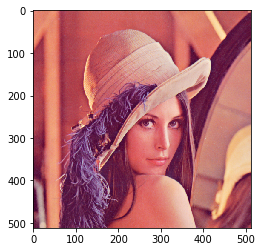

繞X軸翻轉


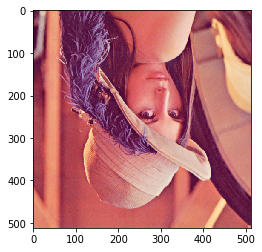

繞Y軸翻轉


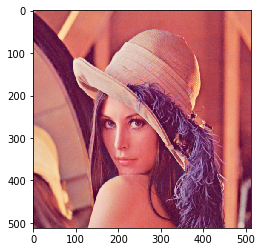

繞X軸及Y軸翻轉


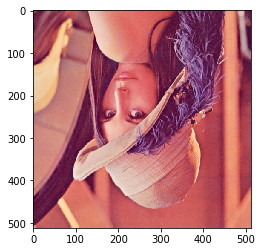

In [4]:
print('原始彩色圖')
plt.imshow(img_RGB)
plt.show()

img_RGB_flip = cv2.flip(img_RGB, 0)
print('繞X軸翻轉')
plt.imshow(img_RGB_flip)
plt.show()

img_RGB_flip = cv2.flip(img_RGB, 1)
print('繞Y軸翻轉')
plt.imshow(img_RGB_flip)
plt.show()

img_RGB_flip = cv2.flip(img_RGB, -1)
print('繞X軸及Y軸翻轉')
plt.imshow(img_RGB_flip)
plt.show()

## 仿射

仿射可以實現影像的平移、旋轉或是將影像變為平行四邊形或是其他任意矩形，在影像中會保持平直性及平行性，平直性代表影像中的直線經過轉換後仍為直線，平行線代表影像中的任意兩平行線經過轉換後仍然保持平行，在OpenCV中可以使用`cv2.warpAffine()`實現仿射功能，函式如下:

`dst = cv2.warpAffine(src, M, dsize[, flags[, borderMode[, borderValue]]])`

dst為輸出的圖片，src為輸入圖片，M為一個2X3的轉換矩陣，dsize為輸出影像尺寸，flags為內插方式，選項和預設值與縮放的interpolation相同，borderMode為邊類型，也就是位移後原來的位置要如何填補，預設為BORDER_CONSTANT，也就是以borderValue填補，borderValue為邊界值，預設為0。

邊類型有以下類型:

`BORDER_REFLICATE`:用最邊界的像素值填充 → aaaaaa | abcdefg | gggggg

`BORDER_REFLECT`:倒映 → gfedcba | abcdefg | gfedcba

`BORDER_REFLECT_101`:倒映，與`BORDER_REFLECT`類似，不重複最邊界像素值 → gfedcb | abcdefg | fedcba

`BORDER_WRAP`: → efgabcdefg | abcdefg | abcdefgabc

`BORDER_CONSTANT`:用指定的borderValue值來填補 → borderValue borderValue | abcdef | borderValue borderValue

其中輸出矩陣仿射的過程就是將輸入影像與轉換矩陣M做相乘:

$
dst(x, y) = src(M_{11}x+M_{12}y+M_{13}, M_{21}x+M_{22}y+M_{23})
$

使用不同的轉換矩陣就可以得到不同的仿射效果。

## 仿射-平移

要將圖片做平移也就是讓x及y的值加減某一常數，例如我們要將圖片的x值和y值各增加100及150像素，我們可以將式子理解為:

$
dst(x, y) = src(x + 100, y + 150)
$

將前述格式帶入則為:

$
dst(x, y) = src(1 \cdot x +0 \cdot y + 100, 0 \cdot x + 1 \cdot y + 150)
$

由此我們可以得到轉換矩陣M為:

$
M = 
\begin{bmatrix}
1 & 0 & 100\\
0 & 1 & 150\\
\end{bmatrix}
$

原始彩色圖


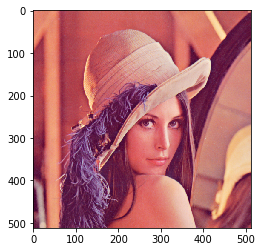

仿射位移-黑色填補(預設)


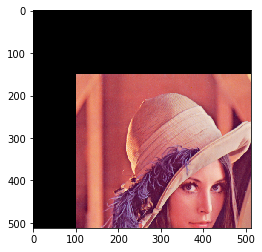

仿射位移-白色填補


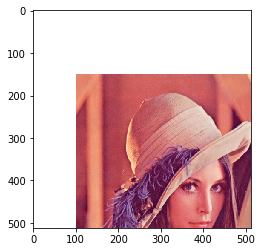

仿射位移-BORDER_REPLICATE填補


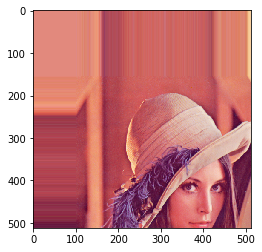

仿射位移-BORDER_WRAP填補


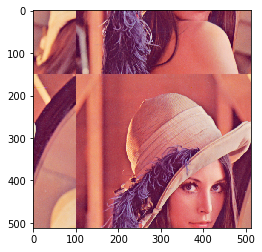

In [5]:
print('原始彩色圖')
plt.imshow(img_RGB)
plt.show()

M = np.float32([[1, 0, 100], [0, 1, 150]])
# 位移後預設以0填補(黑色)
img_RGB_warpAffine = cv2.warpAffine(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]))
print('仿射位移-黑色填補(預設)')
plt.imshow(img_RGB_warpAffine)
plt.show()

# 位移後改以白色填補
img_RGB_warpAffine = cv2.warpAffine(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]), borderValue = (255,255,255))
print('仿射位移-白色填補')
plt.imshow(img_RGB_warpAffine)
plt.show()

# 位移後用BORDER_REPLICATE方式填補
img_RGB_warpAffine = cv2.warpAffine(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]), borderMode = cv2.BORDER_REPLICATE)
print('仿射位移-BORDER_REPLICATE填補')
plt.imshow(img_RGB_warpAffine)
plt.show()

# 位移後用BORDER_WRAP方式填補
img_RGB_warpAffine = cv2.warpAffine(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]), borderMode = cv2.BORDER_WRAP)
print('仿射位移-BORDER_WRAP填補')
plt.imshow(img_RGB_warpAffine)
plt.show()

## 仿射-旋轉

要將圖片做旋轉時，可以透過`cv2.getRotationMatrix2D`取得轉換矩陣，函式如下:

`retval = cv2.getRotationMatrix2D(center, angle, scale)`

retval為傳回的轉換矩陣M，center為旋轉的中心點，angle為旋轉角度，scale為旋轉後的縮放大小。

原始彩色圖


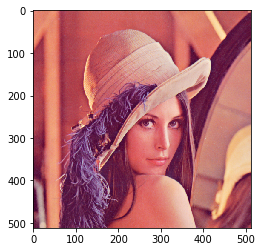

仿射旋轉-黑色填補(預設)


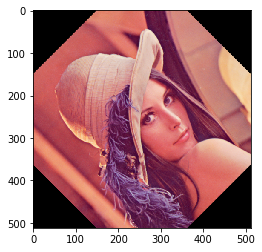

仿射位移-BORDER_REPLICATE填補


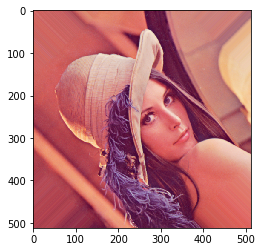

In [6]:
print('原始彩色圖')
plt.imshow(img_RGB)
plt.show()

# 以圖片中心點做旋轉45度
M = cv2.getRotationMatrix2D((img_RGB.shape[1] / 2, img_RGB.shape[0] / 2), 45, 1)
# 位移後預設以0填補(黑色)
img_RGB_warpAffine = cv2.warpAffine(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]))
print('仿射旋轉-黑色填補(預設)')
plt.imshow(img_RGB_warpAffine)
plt.show()

# 位移後改以BORDER_REPLICATE填補
img_RGB_warpAffine = cv2.warpAffine(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]), borderMode = cv2.BORDER_REPLICATE)
print('仿射位移-BORDER_REPLICATE填補')
plt.imshow(img_RGB_warpAffine)
plt.show()

>可以發現填補也會依照旋轉後的角度延伸填補。

## 仿射-複雜轉換(平行四邊形)

要將圖片在矩形與平行四邊形間相互轉換可以使用`cv2.getAffineTransform()`取得轉換矩陣，函式如下:

`retval = cv2.getAffineTransform(src, dst)`

retval為傳回的轉換矩陣M，src為輸入影像的三個座標點，dst為轉換影像的三個座標點。

src及dst為包含三個(x, y)座標的陣列，三個座標分別對應平行四邊形的左上角、右上角及左下角三個點，由於矩形與平行四邊形知道三個頂點後就可以得知第四個頂點，故只需要輸入三個座標。

原始彩色圖


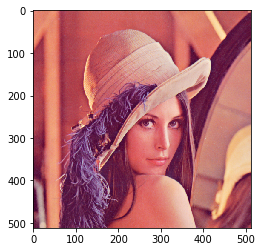

仿射旋轉-黑色填補(預設)


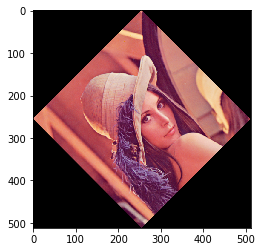

仿射轉換平行四邊形-黑色填補(預設)


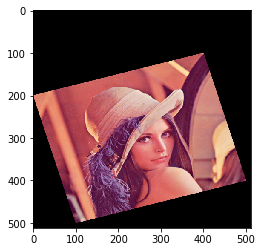

In [7]:
print('原始彩色圖')
plt.imshow(img_RGB)
plt.show()

# 以圖片中心點做旋轉-45度並縮小
M = cv2.getAffineTransform(np.float32([[0, 0], [511, 0], [0, 511]]), np.float32([[0, 255], [255, 0], [255, 511]]))
# 轉換後預設以0填補(黑色)
img_RGB_warpAffine = cv2.warpAffine(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]))
print('仿射旋轉-黑色填補(預設)')
plt.imshow(img_RGB_warpAffine)
plt.show()

M = cv2.getAffineTransform(np.float32([[0, 0], [511, 0], [0, 511]]), np.float32([[0, 200], [400, 100], [100, 500]]))
# 轉換後預設以0填補(黑色)
img_RGB_warpAffine = cv2.warpAffine(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]))
print('仿射轉換平行四邊形-黑色填補(預設)')
plt.imshow(img_RGB_warpAffine)
plt.show()

## 透視

要將圖片在矩形與任意四邊形間相互轉換可以使用`cv2.getPerspectiveTransform()`取得轉換矩陣，函式如下:

`retval = cv2.getPerspectiveTransform(src, dst)`

retval為傳回的轉換矩陣M，src為輸入影像的四個座標點，dst為轉換影像的四個座標點。

src及dst為包含四個(x, y)座標的陣列，四個座標分別對應平行四邊形的左上角、右上角、左下角及右下角四個點，由於矩形與任意四邊形必須知道四個頂點後才能進行轉換，故必須輸入四個座標。

進行轉換時也必須改用`cv2.warpPerspective`實現透視功能，函式如下:

`dst = cv2.warpPerspective(src, M, dsize[, flags[, borderMode[, borderValue]]])`

參數與仿射函式`cv2.warpAffine`相同。

原始彩色圖


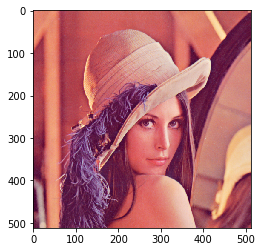

透視旋轉-黑色填補(預設)


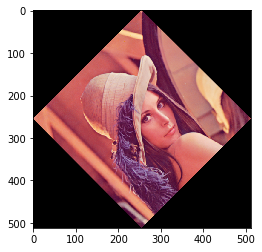

透視轉換任意四邊形-黑色填補(預設)


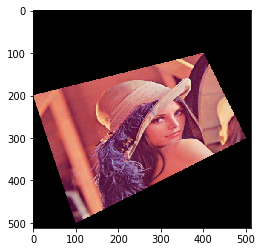

轉換為凹四邊形可能會有無法解讀的效果


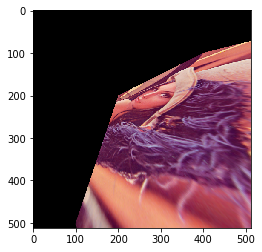

In [8]:
print('原始彩色圖')
plt.imshow(img_RGB)
plt.show()

# 以圖片中心點做旋轉-45度並縮小
M = cv2.getPerspectiveTransform(np.float32([[0, 0], [511, 0], [0, 511], [511, 511]]), np.float32([[0, 255], [255, 0], [255, 511], [511, 255]]))
# 轉換後預設以0填補(黑色)
img_RGB_warpAffine = cv2.warpPerspective(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]))
print('透視旋轉-黑色填補(預設)')
plt.imshow(img_RGB_warpAffine)
plt.show()

M = cv2.getPerspectiveTransform(np.float32([[0, 0], [511, 0], [0, 511], [511, 511]]), np.float32([[0, 200], [400, 100], [100, 500], [500, 300]]))
# 轉換後預設以0填補(黑色)
img_RGB_warpAffine = cv2.warpPerspective(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]))
print('透視轉換任意四邊形-黑色填補(預設)')
plt.imshow(img_RGB_warpAffine)
plt.show()

M = cv2.getPerspectiveTransform(np.float32([[0, 0], [511, 0], [0, 511], [511, 511]]), np.float32([[0, 200], [400, 100], [100, 500], [200, 200]]))
# 轉換後預設以0填補(黑色)
img_RGB_warpAffine = cv2.warpPerspective(img_RGB, M, (img_RGB.shape[1], img_RGB.shape[0]))
print('轉換為凹四邊形可能會有無法解讀的效果')
plt.imshow(img_RGB_warpAffine)
plt.show()